# Installing Basemap

In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     / 133.1 MB 106.0 MB/s
     |████████████████████████████████| 6.6 MB 5.6 MB/s 
     |████████████████████████████████| 219 kB 47.8 MB/s 


In [ ]:
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8 MB 5.1 MB/s 


#Main Section

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from netCDF4 import Dataset
import numpy as np

In [ ]:
def plot_ivt(lats,lons,ivt,ivtu,ivtv,ivt_units,t):
  # Get some parameters for the Stereographic Projection
  lon_0 = 240
  lat_0 = lats.mean()
  m = Basemap(width=4500000,height=3200000,
              resolution='i',projection='stere',
              lat_ts=45,lat_0=lat_0,lon_0=lon_0)

  # use meshgrid to create 2D arrays
  # Not necessary if coordinates are already in 2D arrays.
  lon, lat = np.meshgrid(lons, lats)
  xi, yi = m(lon, lat)

  yy = np.arange(0, yi.shape[0], 4)
  xx = np.arange(0, xi.shape[1], 4)
  points = np.meshgrid(yy, xx)

  # Plot Data
  cs = plt.contourf(xi,yi,np.squeeze(ivt[:,:]),[50,100,150,200,300,400,500,600,700],cmap='YlOrRd')
  # Plotting Arrow
  arrow = m.quiver(xi[points], yi[points], ivtu[points], ivtv[points])
  plt.quiverkey(arrow, X=0.95, Y=-0.3, U=200,
            label='200', labelpos='W',labelsep=0.1)

  # Add Grid Lines
  m.drawparallels(np.arange(0, 70, 5), labels=[1,0,0,0])
  m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

  # Add Coastlines, States, and Country Boundaries
  m.drawcoastlines()
  m.drawstates()
  m.drawcountries()

  # Add Colorbar
  cbar = m.colorbar(cs, location='bottom', pad="10%")
  cbar.set_label(ivt_units)
  cbar.set_ticks([50,100,150,200,300,400,500,600,700])

  # Add Title
  plt.title('I V T_' +'_' + t+'z')
  #plt.savefig('ivt.pdf',bbox_inches='tight',pad_inches=2,transparent=True,dpi=1000)
  plt.savefig('ivt_' + t + 'z.jpg',format='jpg',dpi=1000)

  plt.show()

##Read all Data

In [ ]:
date = input('Enter Date (yymmdd):')

Enter Date (yymmdd):20200210


In [ ]:
data00 = Dataset(r'/content/MERRA2_IVT_{}_00.nc'.format(date))
data06 = Dataset(r'/content/MERRA2_IVT_{}_06.nc'.format(date))
data12 = Dataset(r'/content/MERRA2_IVT_{}_12.nc'.format(date))
data18 = Dataset(r'/content/MERRA2_IVT_{}_18.nc'.format(date))
# Reading features
lat00 = data00.variables['LAT'][:]
lon00 = data00.variables['LON'][:]
ivt00 = data00.variables['ivt'][:]
ivtu00 = data00.variables['ivtu'][:]
ivtv00 = data00.variables['ivtv'][:]
ivt_units00 = data00.variables['ivt'].units

lat06 = data06.variables['LAT'][:]
lon06 = data06.variables['LON'][:]
ivt06 = data06.variables['ivt'][:]
ivtu06 = data06.variables['ivtu'][:]
ivtv06 = data06.variables['ivtv'][:]
ivt_units06 = data06.variables['ivt'].units

lat12 = data12.variables['LAT'][:]
lon12 = data12.variables['LON'][:]
ivt12 = data12.variables['ivt'][:]
ivtu12 = data12.variables['ivtu'][:]
ivtv12 = data12.variables['ivtv'][:]
ivt_units12 = data12.variables['ivt'].units

lat18 = data18.variables['LAT'][:]
lon18 = data18.variables['LON'][:]
ivt18 = data18.variables['ivt'][:]
ivtu18 = data18.variables['ivtu'][:]
ivtv18 = data18.variables['ivtv'][:]
ivt_units18 = data18.variables['ivt'].units

# Plot of 00Z

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:3225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


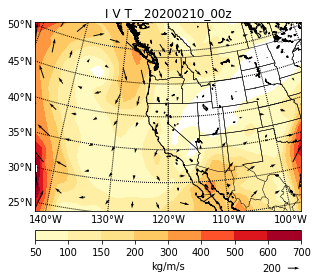

In [ ]:
plot_ivt(lat00,lon00,ivt00,ivtu00,ivtv00,ivt_units00,date+'_00')

# Plot of 06Z

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:3225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


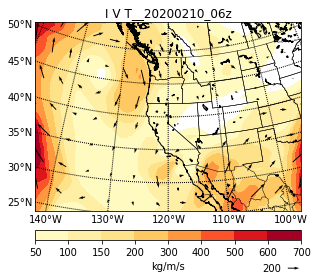

In [ ]:
plot_ivt(lat06,lon00,ivt06,ivtu06,ivtv06,ivt_units06,date+'_06')

# Plot of 12Z

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:3225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


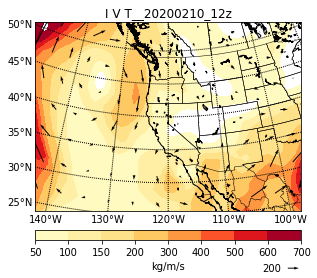

In [ ]:
plot_ivt(lat12,lon12,ivt12,ivtu12,ivtv12,ivt_units12,date+'_12')

# Plot of 18Z

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:3225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


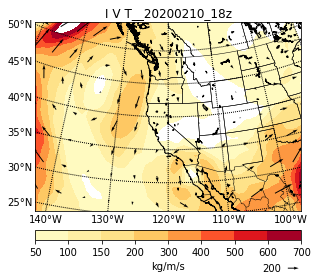

In [ ]:
plot_ivt(lat18,lon18,ivt18,ivtu18,ivtv18,ivt_units18,date+'_18')